In [14]:
import pandas as pd

In [15]:
data = pd.read_csv("Admission_Predict.csv")

In [16]:
data["Admitted"]=data["Chance of Admit"]>=0.75
data = data.drop(["Chance of Admit"], axis=1)

In [17]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
0,1,337,118,4,4.5,4.5,9.65,1,True
1,2,324,107,4,4.0,4.5,8.87,1,True
2,3,316,104,3,3.0,3.5,8.00,1,False
3,4,322,110,3,3.5,2.5,8.67,1,True
4,5,314,103,2,2.0,3.0,8.21,0,False


In [18]:
features = data.drop(["Admitted", "Serial No."], axis=1)
labels= data["Admitted"]

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(features, labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

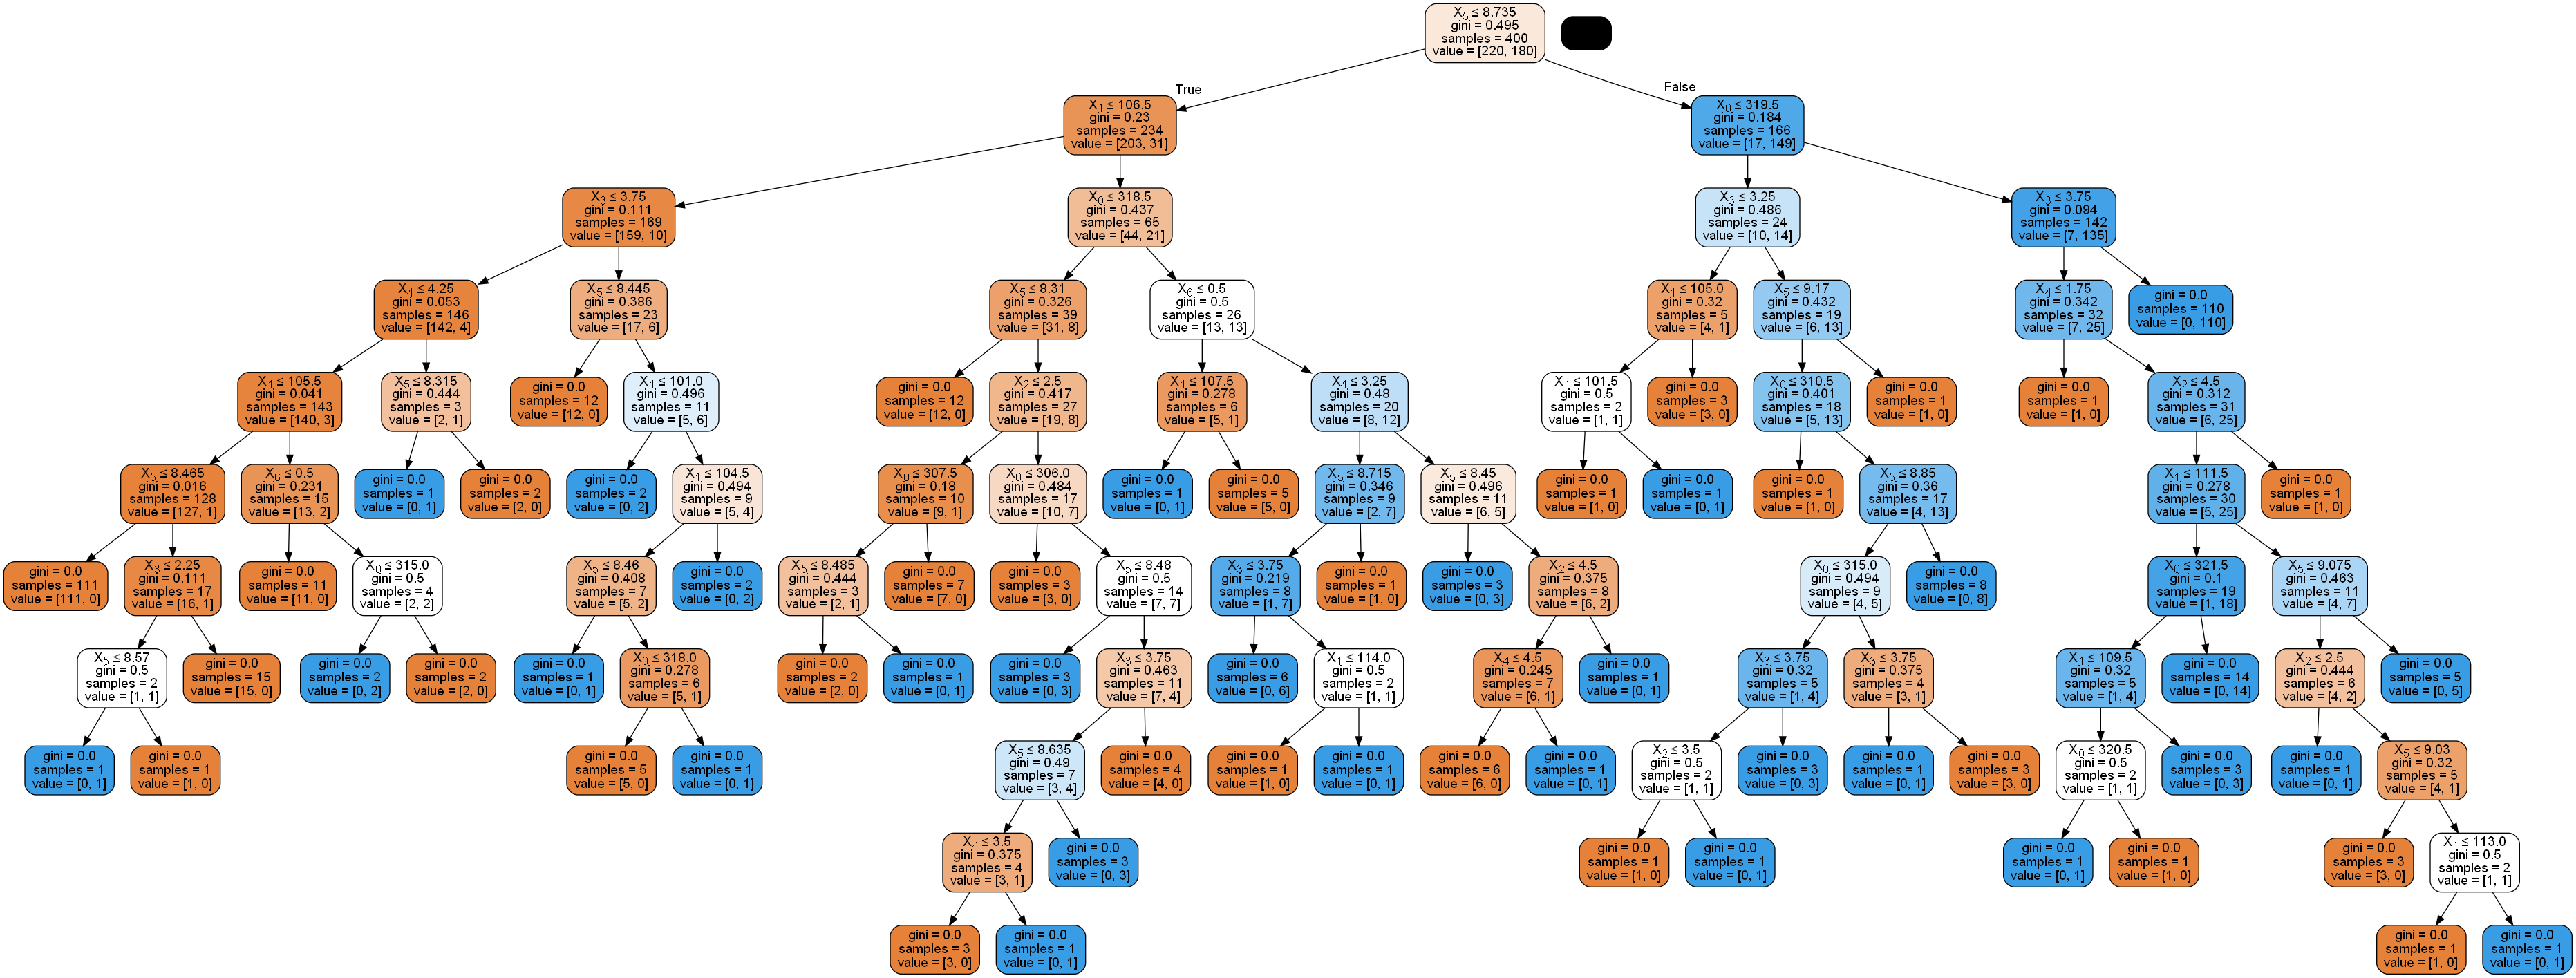

In [20]:
import utils
utils.display_tree(dt)

In [21]:
dt.predict(features[0:5])

array([ True,  True, False,  True, False])

In [22]:
dt.score(features, labels)

1.0

In [23]:
# New model
dt_smaller = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=10)
dt_smaller.fit(features, labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

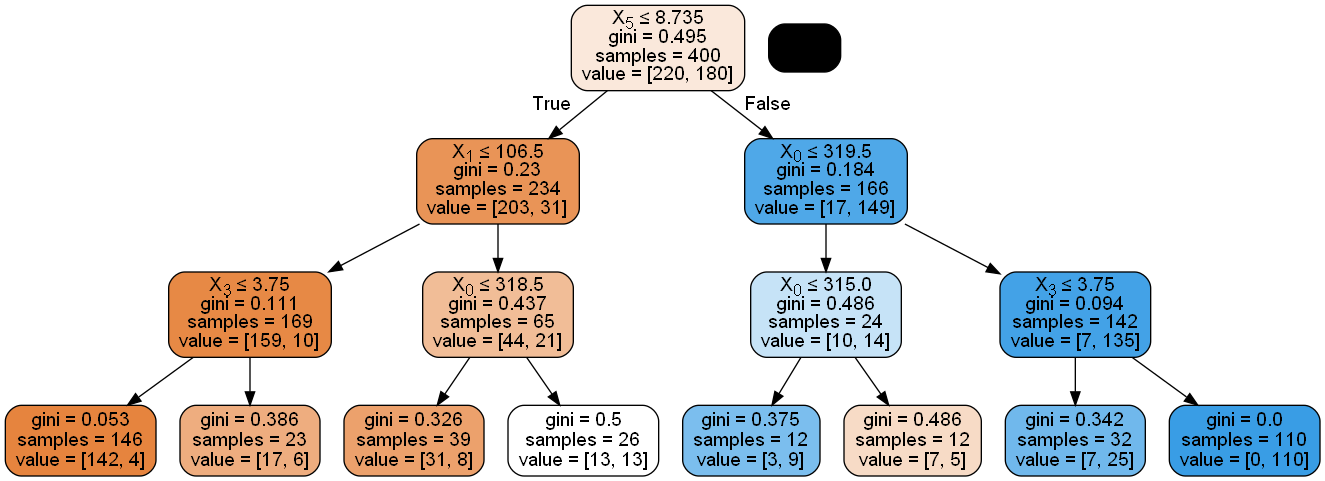

In [24]:
utils.display_tree(dt_smaller)

In [27]:
dt_smaller.score(features, labels)

0.885

In [37]:
dt_smaller.predict([[320, 110, 3, 4.0, 3.5, 8.9, 0]])

array([ True])